In [239]:
from nltk.tokenize.casual import casual_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import pandas as pd
import string
import os
from timeit import default_timer as timer

np.random.seed(2018)

input_filepath="../../data/clean/"
pd.set_option('display.max_rows', 150)
filename="trisma2016_cleaned_text_by_lga_and_time_of_day.csv"

In [168]:
tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0, keep_default_na=False)
docs = tweetdf[['lga','time_of_day','cleaned']][tweetdf.cleaned != '']
docs.columns = ['LGA','time_of_day','cleaned']
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [169]:
# Keep sentiment related stop words
from sklearn.feature_extraction import text
keep_words = ['below','cannot','cant','couldnt','cry','down','empty','enough','empty',
              'everyone','everything','everywhere','full','more','much','must','never',
             'nobody','no','nobody','none','noone','not','nothing','nowhere','over',
             'please','she','sincere','together','toward','under','up','upon','very']

my_stop_words = text.ENGLISH_STOP_WORDS - set(keep_words)

In [170]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from nltk.stem import SnowballStemmer

def smc_tokeniser(doc):
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(w) for w in doc.split(' ')]

In [171]:
target_df = pd.read_csv(input_filepath+"filtered_nonlog_target.csv").iloc[:,1:]
target_df

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [172]:
# Calculate ORDINAL CLASSES FOR TARGETS
from collections import defaultdict
N_PERCENTILES = 5
FACTOR = 100/N_PERCENTILES
crimes = target_df.columns[1:]
ord_df = pd.DataFrame()
ord_df['LGA'] = target_df['LGA']
crime_medians = defaultdict(list)
for i, crime in enumerate(crimes):
    for percent in np.arange(N_PERCENTILES):
        crime_medians[crime].append(np.percentile(target_df[crime], percent * FACTOR + (FACTOR / 2)))
    q = pd.qcut(target_df[crime], N_PERCENTILES, labels=False)
    ord_df[crime] = q
target_df = ord_df
print(crime_medians)
print(target_df)

defaultdict(<class 'list'>, {'Assault - domestic violence': [171.06562000000002, 271.72618, 374.4987, 523.71286, 785.9449900000001], 'Assault - non-domestic violence': [181.35974, 290.62549, 374.3198, 524.62065, 713.4307599999999], 'Fraud': [220.89363, 346.51187999999996, 416.84900000000005, 540.97946, 782.6358200000003], 'Sexual Offences': [85.29491999999999, 132.30214, 186.27925, 239.34599, 314.72315000000015], 'Malicious damage to property': [433.22554, 636.11867, 899.7988, 1130.4908, 1590.594], 'Prohibited weapons offences': [62.578520000000005, 151.84701, 217.7988, 296.53367999999995, 480.1195500000002]})
                              LGA  Assault - domestic violence  \
0                          Albury                            3   
1               Armidale Regional                            3   
2                         Ballina                            1   
3               Bathurst Regional                            2   
4                         Bayside                   

In [173]:
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [174]:
# Expand targets to include time_of_day:
target_df = docs[['LGA','time_of_day']].merge(target_df, on='LGA')
target_df

,LGA,time_of_day,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,afternoon,3,3,3,3,3,3
1,Albury,evening,3,3,3,3,3,3
2,Albury,morning,3,3,3,3,3,3
3,Albury,night,3,3,3,3,3,3
4,Armidale Regional,afternoon,3,4,4,3,4,3
5,Armidale Regional,evening,3,4,4,3,4,3
6,Armidale Regional,morning,3,4,4,3,4,3
7,Armidale Regional,night,3,4,4,3,4,3
8,Ballina,afternoon,1,1,3,1,2,1
9,Ballina,evening,1,1,3,1,2,1


In [175]:
# SHUFFLE DOCS AND TARGETS IN PLACE PRESERVING GROUPS:
assert len(target_df) == len(docs)
indices = np.arange(len(target_df))
np.random.shuffle(indices.reshape((-1, 4))) # Keeps 4 times of day together
docs = docs.iloc[indices,:]
target_df = target_df.iloc[indices,:]
target_df

,LGA,time_of_day,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
36,Bland,afternoon,2,1,0,3,1,4
37,Bland,evening,2,1,0,3,1,4
38,Bland,morning,2,1,0,3,1,4
39,Bland,night,2,1,0,3,1,4
84,Cessnock,afternoon,4,3,3,2,2,3
85,Cessnock,evening,4,3,3,2,2,3
86,Cessnock,morning,4,3,3,2,2,3
87,Cessnock,night,4,3,3,2,2,3
444,Waverley,afternoon,0,3,4,1,1,0
445,Waverley,evening,0,3,4,1,1,0


In [218]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GroupKFold # Needed for aggregations

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
# THE DATA IS ASSUMED TO BE SHUFFLED (PRESERVING GROUPS) PRIOR TO THIS METHOD BEING CALLED
# No stratification is used as the classes are balanced.
def tfidf_cv(X, y, max_features=None, alpha=0.001, folds=5):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)

    groups = np.arange(len(y)) // 4
    gkf = GroupKFold(n_splits=folds)
    for train_index, test_index in gkf.split(X, y, groups):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy().reset_index(drop=True)
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words=my_stop_words,token_pattern=None)
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names()) # Not currently used
        
        for crime in crimes:
            model = MultinomialNB(alpha=alpha).fit(X_train, np.ravel(y_train_df[[crime]]))
            # Save predictions and probabilities
            y_test_df[crime+' Prediction'] = model.predict(X_test)
            y_test_probs = pd.DataFrame(model.predict_proba(X_test))
            y_test_probs.columns = [crime+' P'+str(col) for col in y_test_probs.columns]
            for col in y_test_probs.columns:
                y_test_df[col] = y_test_probs[col]
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds

In [177]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [219]:
start = timer()
predictions = tfidf_cv(docs,target_df,max_features=5000,alpha=.001,folds=5)
end = timer()
print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')

Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 749.5396353029646 seconds


In [220]:
cols = ['LGA','time_of_day']
for crime in crimes:
    cols.append(crime)
    cols.append(crime+' Prediction')
    for n in np.arange(5):
        cols.append(crime+' P'+str(n))
predictions = predictions[cols]
predictions

,LGA,time_of_day,Assault - domestic violence,Assault - domestic violence Prediction,Assault - domestic violence P0,Assault - domestic violence P1,Assault - domestic violence P2,Assault - domestic violence P3,Assault - domestic violence P4,Assault - non-domestic violence,...,Malicious damage to property P2,Malicious damage to property P3,Malicious damage to property P4,Prohibited weapons offences,Prohibited weapons offences Prediction,Prohibited weapons offences P0,Prohibited weapons offences P1,Prohibited weapons offences P2,Prohibited weapons offences P3,Prohibited weapons offences P4
0,Leeton,afternoon,3,4.0,2.857461e-03,0.021169,7.772099e-02,0.008585,8.896676e-01,3,...,3.846246e-02,0.011900,8.814802e-01,3,4.0,8.843108e-07,0.005072,0.037541,5.018106e-02,9.072054e-01
1,Leeton,evening,3,4.0,6.806528e-03,0.136063,1.274253e-01,0.015901,7.138046e-01,3,...,1.141483e-01,0.023373,6.504156e-01,3,4.0,8.992292e-06,0.013524,0.109260,6.956957e-02,8.076370e-01
2,Leeton,morning,3,1.0,3.536960e-02,0.366114,2.224464e-01,0.073556,3.025134e-01,3,...,3.394794e-01,0.042617,3.996611e-01,3,2.0,2.262738e-04,0.101756,0.393317,2.466882e-01,2.580118e-01
3,Leeton,night,3,4.0,2.705938e-02,0.175595,1.602281e-01,0.029370,6.077481e-01,3,...,6.958932e-02,0.026652,5.408469e-01,3,4.0,1.156019e-05,0.050651,0.109810,1.700232e-01,6.695036e-01
4,Parkes,afternoon,4,1.0,7.929237e-02,0.488538,2.339715e-01,0.103372,9.482569e-02,4,...,7.643479e-01,0.033844,6.394399e-02,2,1.0,2.490811e-01,0.429502,0.104971,3.617165e-02,1.802742e-01
5,Parkes,evening,4,1.0,1.324987e-01,0.420663,2.319824e-01,0.084013,1.308427e-01,4,...,7.359871e-01,0.023122,9.633476e-02,2,4.0,1.732745e-02,0.235689,0.209441,2.798840e-02,5.095537e-01
6,Parkes,morning,4,1.0,9.586526e-02,0.374157,2.437320e-01,0.113495,1.727505e-01,4,...,7.057968e-01,0.028149,1.615864e-01,2,1.0,1.332363e-01,0.431960,0.137947,2.865416e-02,2.682023e-01
7,Parkes,night,4,1.0,1.626060e-01,0.269289,1.659320e-01,0.201996,2.001772e-01,4,...,5.298515e-01,0.062737,2.727778e-01,2,4.0,6.035157e-02,0.275759,0.243608,1.961657e-02,4.006654e-01
8,Parramatta,afternoon,1,0.0,9.942869e-01,0.002645,5.654508e-04,0.002452,5.065989e-05,1,...,2.499331e-03,0.002667,2.146652e-04,1,0.0,9.972511e-01,0.001745,0.000962,3.151675e-05,1.048667e-05
9,Parramatta,evening,1,0.0,9.917366e-01,0.005838,5.227850e-04,0.001866,3.681849e-05,1,...,4.996033e-03,0.003994,3.506681e-04,1,0.0,9.958453e-01,0.002234,0.001885,1.943461e-05,1.701865e-05


In [221]:
for crime in crimes:
    print(crime)
    print('MEAN DISTANCE:',np.mean(abs(predictions[crime+' Prediction'] - predictions[crime])))
    print('ACCURACY:',np.mean(predictions[crime+' Prediction'] == predictions[crime]))

Assault - domestic violence
MEAN DISTANCE: 1.3604166666666666
ACCURACY: 0.27291666666666664
Assault - non-domestic violence
MEAN DISTANCE: 1.34375
ACCURACY: 0.26875
Fraud
MEAN DISTANCE: 1.2375
ACCURACY: 0.29791666666666666
Sexual Offences
MEAN DISTANCE: 1.2625
ACCURACY: 0.2875
Malicious damage to property
MEAN DISTANCE: 1.3395833333333333
ACCURACY: 0.2875
Prohibited weapons offences
MEAN DISTANCE: 1.0145833333333334
ACCURACY: 0.36666666666666664


In [222]:
# Need to aggregate preds from time_of_day back up to LGA level:
aggs = {}
for crime in crimes:
    aggs[crime] = lambda x: np.median(x)
    aggs[crime+' Prediction'] = lambda x: np.median(x)
    for n in np.arange(5):
        aggs[crime+' P'+str(n)] = lambda x: np.mean(x)
predictions = predictions.groupby(['LGA']).agg(aggs).reset_index()

In [250]:
predictions

,LGA,Assault - domestic violence,Assault - domestic violence Prediction,Assault - domestic violence P0,Assault - domestic violence P1,Assault - domestic violence P2,Assault - domestic violence P3,Assault - domestic violence P4,Assault - non-domestic violence,Assault - non-domestic violence Prediction,...,Malicious damage to property P2,Malicious damage to property P3,Malicious damage to property P4,Prohibited weapons offences,Prohibited weapons offences Prediction,Prohibited weapons offences P0,Prohibited weapons offences P1,Prohibited weapons offences P2,Prohibited weapons offences P3,Prohibited weapons offences P4
0,Albury,3.0,0.0,5.532135e-01,3.511020e-01,7.203600e-02,0.021715,1.933890e-03,3.0,1.0,...,1.403395e-01,0.031114,2.200673e-03,3.0,1.0,4.482283e-01,5.051261e-01,4.516627e-02,6.627311e-04,8.166091e-04
1,Armidale Regional,3.0,3.0,8.098971e-02,2.912838e-01,1.367698e-01,0.423850,6.710677e-02,4.0,2.0,...,1.511106e-01,0.477855,4.820298e-02,3.0,2.0,2.148488e-03,2.928207e-01,5.258270e-01,1.546297e-01,2.457410e-02
2,Ballina,1.0,1.0,1.009951e-01,8.217624e-01,5.570941e-02,0.018796,2.736945e-03,1.0,4.0,...,6.656178e-01,0.095054,9.985665e-03,1.0,1.0,3.846473e-03,6.592700e-01,2.998766e-01,3.697484e-02,3.205859e-05
3,Bathurst Regional,2.0,1.0,9.904211e-02,4.794316e-01,1.892371e-01,0.105676,1.266126e-01,3.0,2.5,...,5.264296e-01,0.049291,3.539722e-01,2.0,4.0,1.333122e-01,1.967251e-01,1.414344e-01,7.032634e-02,4.582020e-01
4,Bayside,1.0,0.0,8.904792e-01,2.480783e-02,7.383168e-02,0.009948,9.336798e-04,1.0,1.0,...,3.021198e-03,0.027901,1.485363e-03,0.0,0.0,8.515769e-01,1.414592e-01,2.319313e-03,4.589291e-03,5.535136e-05
5,Bega Valley,1.0,2.0,1.928302e-01,2.674333e-01,4.151889e-01,0.076376,4.817131e-02,2.0,3.0,...,4.245932e-01,0.041665,1.992280e-01,1.0,2.0,1.770298e-02,5.027143e-01,1.201882e-01,3.522165e-01,7.178023e-03
6,Bellingen,1.0,4.0,1.010695e-03,9.682614e-02,2.445732e-01,0.056892,6.006980e-01,1.0,3.0,...,2.614451e-01,0.099027,4.632715e-01,0.0,3.0,8.053980e-06,6.007470e-03,1.775775e-01,6.923657e-01,1.240413e-01
7,Berrigan,0.0,3.0,1.550888e-02,8.807872e-02,4.170933e-01,0.446805,3.251400e-02,0.0,2.0,...,3.878676e-01,0.470025,1.770265e-02,3.0,2.0,6.893266e-04,7.322627e-02,8.035910e-01,3.517952e-02,8.731387e-02
8,Blacktown,3.0,0.0,5.437662e-01,2.358275e-01,1.703922e-01,0.031833,1.818083e-02,3.0,1.0,...,5.588450e-02,0.087920,2.132033e-02,1.0,0.5,4.043578e-01,5.295657e-01,3.420656e-02,3.002417e-02,1.845798e-03
9,Bland,2.0,4.0,2.711134e-03,9.371778e-04,8.651453e-03,0.031254,9.564459e-01,1.0,4.0,...,1.204835e-02,0.021426,9.350392e-01,4.0,4.0,3.791014e-06,3.097930e-04,3.834870e-04,1.779193e-01,8.213836e-01


In [224]:
for crime in crimes:
    print(crime)
    print('MEAN DISTANCE:',np.mean(abs(predictions[crime+' Prediction'] - predictions[crime])))
    print('ACCURACY:',np.mean(predictions[crime+' Prediction'] == predictions[crime]))

Assault - domestic violence
MEAN DISTANCE: 1.3625
ACCURACY: 0.275
Assault - non-domestic violence
MEAN DISTANCE: 1.2833333333333334
ACCURACY: 0.23333333333333334
Fraud
MEAN DISTANCE: 1.1833333333333333
ACCURACY: 0.2916666666666667
Sexual Offences
MEAN DISTANCE: 1.1833333333333333
ACCURACY: 0.25833333333333336
Malicious damage to property
MEAN DISTANCE: 1.3208333333333333
ACCURACY: 0.25833333333333336
Prohibited weapons offences
MEAN DISTANCE: 0.9416666666666667
ACCURACY: 0.35833333333333334


Use RFR to perform regression on MNB probabilities

In [228]:
# Obtain targets for RFR
targets = pd.read_csv(input_filepath+"filtered_nonlog_target.csv").iloc[:,1:]
targets

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [229]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe of input variables
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def rfr_cv(X, y, folds=5, verbose=False, random_state=2018):
    assert len(X) == len(y)

    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()

        model = RandomForestRegressor(random_state=random_state)
        model.fit(X_train_df, y_train_df.iloc[:,-1])

        # Save important features
        importances = model.feature_importances_
        for i in range(len(importances)):
            importants[X_train_df.columns[i]] += importances[i] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test_df)
        preds = pd.concat([preds,y_test_df])

        if verbose:
            print('Finished processing',len(preds),'records...')
    preds = preds.sort_values(by=[preds.columns[0]]).reset_index(drop=True)
    return preds, importants

In [230]:
def repeat_rfr_cv(X, y, reps=10, folds=10, random_state=2018):
    np.random.seed(random_state)
    all_preds = pd.DataFrame()
    all_importants = defaultdict(float)
    for rep in np.arange(reps):
        preds, importants = rfr_cv(X, y, folds=folds, random_state=None)
        for (k,v) in importants.items():
            all_importants[k] += v / reps
        all_preds = all_preds.append(preds)
    all_preds = all_preds.groupby("LGA").mean().reset_index()
    return all_preds, all_importants

In [231]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()


Run an analysis on all 6 target variables. Store the results for later use in other models:

Assault - domestic violence
Finished 10x10 fold cross validation in 1.1958626229898073 seconds
MOST IMPORTANT FEATURES:
Assault - domestic violence P4 0.3431571800278665
Assault - domestic violence P2 0.17958311653340123
Assault - domestic violence P1 0.1732658055886894
Assault - domestic violence P0 0.16270752442938638
Assault - domestic violence P3 0.1412863734206565
R2: -0.04303844202800433
RMSE: 299.5251065711487
MAPE: 69.60448498169929
Mean APE Baseline: 72.09140356370095


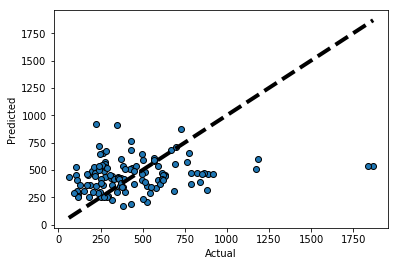

Assault - non-domestic violence
Finished 10x10 fold cross validation in 7.288743920973502 seconds
MOST IMPORTANT FEATURES:
Assault - non-domestic violence P3 0.2251170926393993
Assault - non-domestic violence P2 0.20080580432976605
Assault - non-domestic violence P0 0.19676791065588384
Assault - non-domestic violence P1 0.192611627354212
Assault - non-domestic violence P4 0.1846975650207388
R2: -0.16653274479051672
RMSE: 262.56871853427873
MAPE: 63.551046701168346
Mean APE Baseline: 59.83267716016895


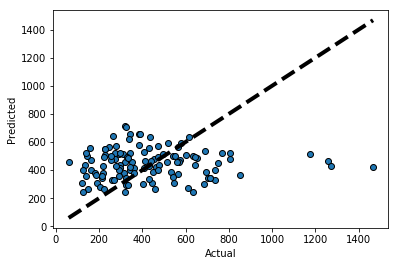

Fraud
Finished 10x10 fold cross validation in 1.1757531759794801 seconds
MOST IMPORTANT FEATURES:
Fraud P4 0.4237145113579618
Fraud P1 0.2192445021294283
Fraud P0 0.1298797178454489
Fraud P3 0.11522028321071905
Fraud P2 0.11194098545644193
R2: 0.00882936033026338
RMSE: 287.9245291948208
MAPE: 44.610687197755425
Mean APE Baseline: 50.56437861497196


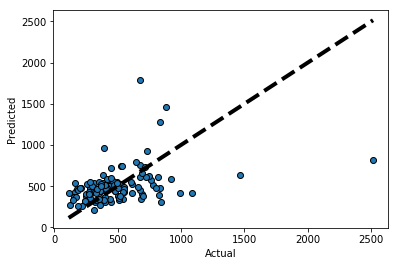

Sexual Offences
Finished 10x10 fold cross validation in 1.2365322090336122 seconds
MOST IMPORTANT FEATURES:
Sexual Offences P0 0.3188711374238467
Sexual Offences P3 0.25647202655368895
Sexual Offences P2 0.15889310298441242
Sexual Offences P4 0.14516824958757502
Sexual Offences P1 0.12059548345047691
R2: 0.019289251596210755
RMSE: 92.4465164064757
MAPE: 44.66985343399254
Mean APE Baseline: 53.08218065832499


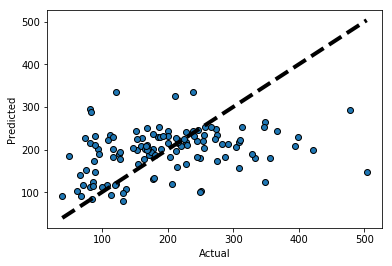

Malicious damage to property
Finished 10x10 fold cross validation in 1.1859280989738181 seconds
MOST IMPORTANT FEATURES:
Malicious damage to property P4 0.32253586865448947
Malicious damage to property P3 0.18245382048370107
Malicious damage to property P2 0.18111877871400292
Malicious damage to property P0 0.18013119660515992
Malicious damage to property P1 0.13376033554264663
R2: -0.061614737703750366
RMSE: 590.2520286528118
MAPE: 50.68949375242675
Mean APE Baseline: 53.423893616506355


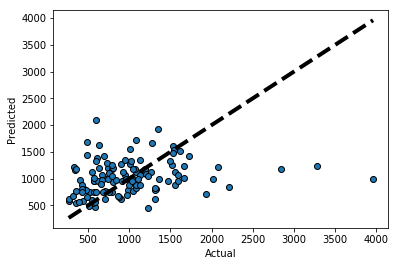

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.1761293690069579 seconds
MOST IMPORTANT FEATURES:
Prohibited weapons offences P4 0.34621366046200763
Prohibited weapons offences P0 0.2353016252824561
Prohibited weapons offences P2 0.16423941819112353
Prohibited weapons offences P1 0.13763468294852835
Prohibited weapons offences P3 0.11661061311588446
R2: 0.17407475012412443
RMSE: 135.56079749699333
MAPE: 82.48712338661767
Mean APE Baseline: 126.65985983247047


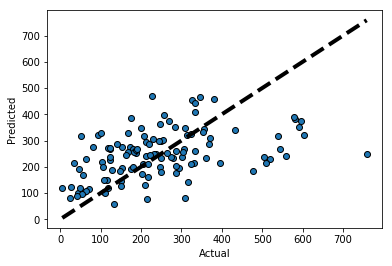

,LGA,MNB Assault - domestic violence,MNB Assault - non-domestic violence,MNB Fraud,MNB Sexual Offences,MNB Malicious damage to property,MNB Prohibited weapons offences
0,Albury,287.756257,375.195975,750.631303,214.812874,616.319615,140.929439
1,Armidale Regional,591.106064,483.687825,313.843842,208.888189,849.286931,176.887278
2,Ballina,253.469309,461.089265,475.454678,165.707861,746.445565,193.670263
3,Bathurst Regional,520.208428,423.565384,342.891136,216.393852,1169.521138,470.949963
4,Bayside,221.948455,480.485338,926.269657,84.058772,479.648665,104.582772
5,Bega Valley,423.121217,523.649948,534.631894,198.920730,929.188372,274.417125
6,Bellingen,569.349366,640.731073,386.863104,200.470749,1384.161491,319.608130
7,Berrigan,457.463682,355.627343,432.494354,295.537420,1010.554042,233.363865
8,Blacktown,409.313514,480.984702,608.002138,179.019828,795.814044,182.931718
9,Bland,908.102117,380.410980,480.072529,218.891483,1205.829286,456.609463


In [240]:
output = pd.DataFrame()
for crime in crimes:
    print(crime)
    start = timer()
    X_cols =  [crime+' P'+str(n) for n in np.arange(5)]
    y_cols = ['LGA',crime]
    X = predictions[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'MNB '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [246]:
output = output.merge(predictions, on='LGA')
output

,LGA,MNB Assault - domestic violence,MNB Assault - non-domestic violence,MNB Fraud,MNB Sexual Offences,MNB Malicious damage to property,MNB Prohibited weapons offences,Assault - domestic violence,Assault - domestic violence Prediction,Assault - domestic violence P0,...,Malicious damage to property P2,Malicious damage to property P3,Malicious damage to property P4,Prohibited weapons offences,Prohibited weapons offences Prediction,Prohibited weapons offences P0,Prohibited weapons offences P1,Prohibited weapons offences P2,Prohibited weapons offences P3,Prohibited weapons offences P4
0,Albury,287.756257,375.195975,750.631303,214.812874,616.319615,140.929439,3.0,0.0,5.532135e-01,...,1.403395e-01,0.031114,2.200673e-03,3.0,1.0,4.482283e-01,5.051261e-01,4.516627e-02,6.627311e-04,8.166091e-04
1,Armidale Regional,591.106064,483.687825,313.843842,208.888189,849.286931,176.887278,3.0,3.0,8.098971e-02,...,1.511106e-01,0.477855,4.820298e-02,3.0,2.0,2.148488e-03,2.928207e-01,5.258270e-01,1.546297e-01,2.457410e-02
2,Ballina,253.469309,461.089265,475.454678,165.707861,746.445565,193.670263,1.0,1.0,1.009951e-01,...,6.656178e-01,0.095054,9.985665e-03,1.0,1.0,3.846473e-03,6.592700e-01,2.998766e-01,3.697484e-02,3.205859e-05
3,Bathurst Regional,520.208428,423.565384,342.891136,216.393852,1169.521138,470.949963,2.0,1.0,9.904211e-02,...,5.264296e-01,0.049291,3.539722e-01,2.0,4.0,1.333122e-01,1.967251e-01,1.414344e-01,7.032634e-02,4.582020e-01
4,Bayside,221.948455,480.485338,926.269657,84.058772,479.648665,104.582772,1.0,0.0,8.904792e-01,...,3.021198e-03,0.027901,1.485363e-03,0.0,0.0,8.515769e-01,1.414592e-01,2.319313e-03,4.589291e-03,5.535136e-05
5,Bega Valley,423.121217,523.649948,534.631894,198.920730,929.188372,274.417125,1.0,2.0,1.928302e-01,...,4.245932e-01,0.041665,1.992280e-01,1.0,2.0,1.770298e-02,5.027143e-01,1.201882e-01,3.522165e-01,7.178023e-03
6,Bellingen,569.349366,640.731073,386.863104,200.470749,1384.161491,319.608130,1.0,4.0,1.010695e-03,...,2.614451e-01,0.099027,4.632715e-01,0.0,3.0,8.053980e-06,6.007470e-03,1.775775e-01,6.923657e-01,1.240413e-01
7,Berrigan,457.463682,355.627343,432.494354,295.537420,1010.554042,233.363865,0.0,3.0,1.550888e-02,...,3.878676e-01,0.470025,1.770265e-02,3.0,2.0,6.893266e-04,7.322627e-02,8.035910e-01,3.517952e-02,8.731387e-02
8,Blacktown,409.313514,480.984702,608.002138,179.019828,795.814044,182.931718,3.0,0.0,5.437662e-01,...,5.588450e-02,0.087920,2.132033e-02,1.0,0.5,4.043578e-01,5.295657e-01,3.420656e-02,3.002417e-02,1.845798e-03
9,Bland,908.102117,380.410980,480.072529,218.891483,1205.829286,456.609463,2.0,4.0,2.711134e-03,...,1.204835e-02,0.021426,9.350392e-01,4.0,4.0,3.791014e-06,3.097930e-04,3.834870e-04,1.779193e-01,8.213836e-01


In [247]:
output.to_csv("../../data/clean/tfidf_by_lga_and_time_of_day_2016_mnb_preds.csv",index=False)

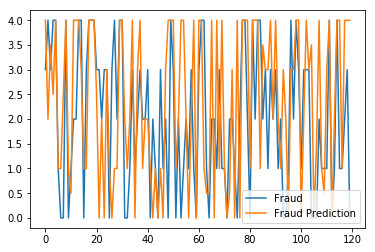

In [249]:
output[['Fraud','Fraud Prediction']].plot()